<a href="https://colab.research.google.com/github/gyurmey/tensorflow/blob/main/digitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [49]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

len(x_train)

len(x_test)

x_train[0].shape

(28, 28)

In [50]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

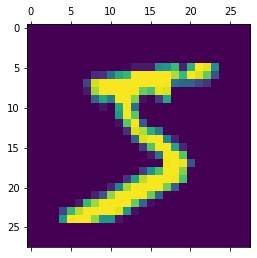

In [51]:
plt.matshow(x_train[0])

In [52]:
y_train[0]

5

In [53]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [54]:
x_train.shape

(60000, 28, 28)

In [55]:
x_train = x_train / 255
x_test = x_test / 255

In [56]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [91]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [83]:
x_train_flattened.shape

(60000, 784)

In [78]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4721 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3040 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2674 - accuracy: 0.9255


In [60]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2702 - accuracy: 0.9250


[0.2701656222343445, 0.925000011920929]

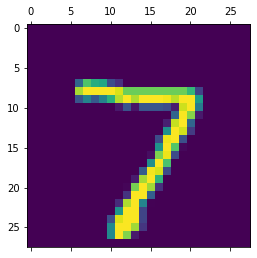

In [61]:
plt.matshow(x_test[0])

In [62]:
# Make the predictions
y_predicted = model.predict(x_test_flattened)
y_predicted[0]


313/313 [==============================] - 1s 2ms/step


array([1.77773610e-02, 2.82748829e-07, 9.37069580e-02, 9.43544447e-01,
       2.01184186e-03, 1.15144886e-01, 2.17772708e-06, 9.99793470e-01,
       1.02039367e-01, 7.04092205e-01], dtype=float32)

In [63]:
np.argmax(y_predicted[0])

7

In [64]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [65]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    4,    2,    0,    6,    6,    2,    1,    0],
       [   0, 1111,    5,    1,    0,    1,    4,    2,   11,    0],
       [   3,    7,  950,    7,    7,    5,   12,    9,   27,    5],
       [   2,    0,   35,  888,    0,   39,    2,   11,   23,   10],
       [   1,    1,    9,    0,  892,    0,    9,    4,    9,   57],
       [   8,    3,    8,   17,    7,  799,   11,    5,   25,    9],
       [  11,    3,   12,    1,    7,   14,  907,    2,    1,    0],
       [   1,    5,   28,    3,    4,    1,    0,  947,    2,   37],
       [   7,    7,   11,   13,    9,   32,    9,   10,  861,   15],
       [  10,    7,    2,    7,   16,    8,    0,   19,    4,  936]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

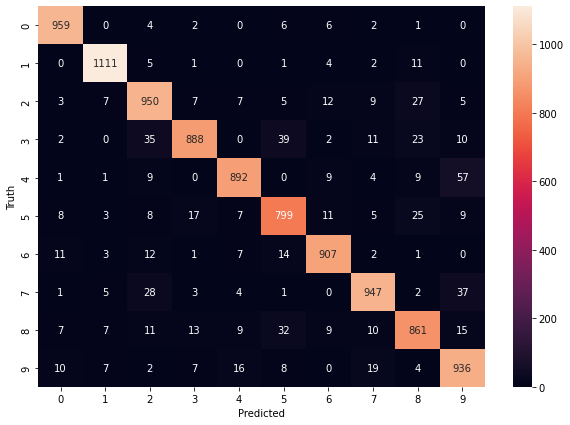

In [66]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [67]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2721 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1199 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0847 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0642 - accuracy: 0.9813
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0512 - accuracy: 0.9840


In [68]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0813 - accuracy: 0.9751


[0.08127988874912262, 0.9750999808311462]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

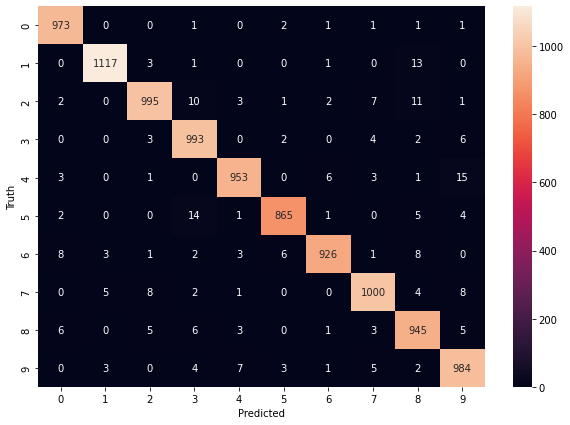

In [69]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [86]:
# Flattening data using keras Flatten class
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [88]:
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5


ValueError: ignored